## Data Analysis for Final Project

#### Tittle: Synthesis of Sodalite Through Modification of Coal Fly Ash with CTAB (Cetyltrimethylammonium Bromide) for the Adsorption of Methyl Orange Dye 

Created by: Ricky Fasha Setiawan (NIM 20/462246/PA/20218)

This code contains XRD and PZC data analysis of CFA-S and CFA-S-CTAB Study

#### 1. File Conversion

In [14]:
import pandas as pd

def convert_excel_to_xy(input_file, output_file):
    # Read the Excel file
    df = pd.read_excel(input_file)

    # Save the DataFrame to a text file with .xy extension
    df.to_csv(output_file, sep='\t', index=False, header=None)

if __name__ == "__main__":
    # Replace 'XRD_CFA_S_CTAB.xls' and 'output.xy' with your file names
    input_excel_file = 'C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/XRD/2882a CFA - Sodalite/XRD_CFA_S_CTAB.xls'
    output_xy_file = 'XRD_CFA_S_CTAB.xy'

    convert_excel_to_xy(input_excel_file, output_xy_file)

    print(f"Conversion complete. Data saved to {output_xy_file}")

Conversion complete. Data saved to XRD_CFA_S_CTAB.xy


In [4]:
import pandas as pd

def convert_excel_to_xy(input_file, output_file):
    # Read the Excel file
    df = pd.read_excel(input_file)

    # Save the DataFrame to a text file with .xy extension
    df.to_csv(output_file, sep='\t', index=False, header=None)

if __name__ == "__main__":
    # Replace 'XRD_CFA_S_CTAB.xls' and 'output.xy' with your file names
    input_excel_file = 'C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/XRD/2882b CFA - Sodalite - CTAB/XRD_CFA_S.xls'
    output_xy_file = 'XRD_CFA_S.xy'

    convert_excel_to_xy(input_excel_file, output_xy_file)

    print(f"Conversion complete. Data saved to {output_xy_file}")

Conversion complete. Data saved to XRD_CFA_S.xy


#### 2. XRD

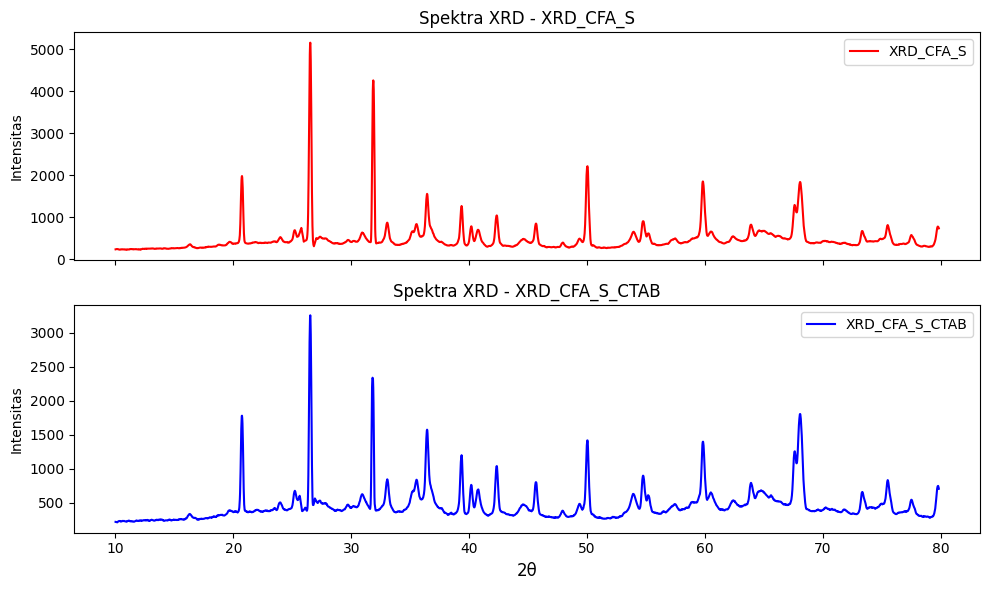

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def load_xy_file(file_path):
    data = np.loadtxt(file_path, skiprows=1, usecols=(0, 1))  # Skip header if present, use only the first two columns
    x, y = data[:, 0], data[:, 1]
    return x, y

def smooth_spectrum(x, y, smoothing_factor=10):
    smoothed_y = np.convolve(y, np.ones(smoothing_factor)/smoothing_factor, mode='valid')
    return x[:len(smoothed_y)], smoothed_y

if __name__ == "__main__":
    # Load data from XRD_CFA_S.xy
    x1, y1 = load_xy_file('XRD_CFA_S.xy')

    # Load data from XRD_CFA_S_CTAB.xy
    x2, y2 = load_xy_file('XRD_CFA_S_CTAB.xy')

    # Smooth the spectra
    x1_smooth, y1_smooth = smooth_spectrum(x1, y1)
    x2_smooth, y2_smooth = smooth_spectrum(x2, y2)

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))

    # Plot the smooth spectra with a distinctive line for XRD_CFA_S
    ax1.plot(x1_smooth, y1_smooth, label='XRD_CFA_S', color='red', linewidth=1.5)
    ax1.legend()
    ax1.set_ylabel('Intensitas',fontsize=10)
    ax1.set_title('Spektra XRD - XRD_CFA_S')

    # Plot the smooth spectra for XRD_CFA_S_CTAB
    ax2.plot(x2_smooth, y2_smooth, label='XRD_CFA_S_CTAB', color='blue', linewidth=1.5)
    ax2.set_xlabel('2θ', fontsize=12)
    ax2.set_ylabel('Intensitas', fontsize=10)
    ax2.legend()
    ax2.set_title('Spektra XRD - XRD_CFA_S_CTAB')

    # Adjust layout
    plt.tight_layout()

    # Save the entire figure to one file
    plt.savefig('XRD Spectra.png', dpi=300)

    # Show the plot (optional)
    plt.show()


#### 3. PZC Study

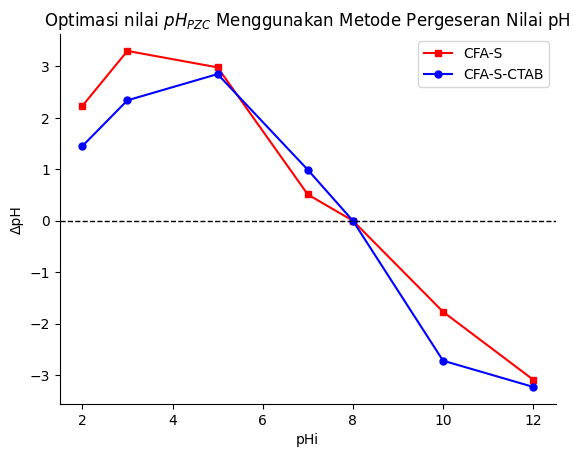

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
df_cfa_s = pd.read_excel('C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Code/PZC CFA-S.xlsx')
df_cfa_s_ctab = pd.read_excel('C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Code/PZC CFA-S-CTAB.xlsx')

# Plot pHi vs. ΔpH for CFA-S
plt.plot(df_cfa_s['pHi'], df_cfa_s['ΔpH'], label='CFA-S', marker='s', linestyle='-', color='red', markersize=5)

# Plot pHi vs. ΔpH for CFA-S-CTAB
plt.plot(df_cfa_s_ctab['pHi'], df_cfa_s_ctab['ΔpH'], label='CFA-S-CTAB', marker='o', linestyle='-', color='blue', markersize=5)

# Add a straight line at y=0
plt.axhline(0, color='black', linestyle='--', linewidth=1)

# Customize the plot
plt.xlabel('pHi')
plt.ylabel('ΔpH')
plt.title('Optimasi nilai $pH_{PZC}$ Menggunakan Metode Pergeseran Nilai pH')
plt.legend()

# Remove grid
plt.grid(False)

# Customize aesthetics (optional)
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

# Show the plot
plt.show()
